In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
import sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,4)})

In [4]:
df = pd.read_csv('/Users/vanshikatib/Downloads/sentiment_analysis.csv')

In [5]:
df.head(10)

,Unnamed: 0,asin,reviewerID,reviewerName,rating,reviewText,sentiment_polarity,sentiment_level
0,0,B00005N7P0,A5QQOOZJOVPSF,John L. Mehlmauer,4,"I'm old, and so is my computer. Any advice th...",0.600000,Positive
1,1,B00005N7PS,A5RHZE7B8SV5Q,gorillazfan249,5,"There's nothing to say, but if you want a REAL...",0.282143,Mildy Positive
2,2,B00005N7PS,A1RPTVW5VEOSI,Michael J. Edelman,1,If you're the kind of man who looks at himself...,0.005000,Mildy Positive
3,3,B00005N7PS,A1SFRBCMW8XVBW,Hoyett L. Barnett,1,Nothing to it. Just an advertisement. Little...,-0.187500,Mildy Negative
4,4,B00005N7P0,A1IU9VPCBKZPE8,Randolph Eck,5,When PC Magazine ceased publication of their p...,0.217273,Mildy Positive
5,5,B00005N7PS,AG6TX1ZJHLMO7,W. Dietrich,4,Details is much less indepth / informative as ...,0.138645,Mildy Positive
6,6,B00005N7P0,A3OIE7IE9LTPJG,GatorMan,5,In my mind BEST PC Magazine for upgrades / har...,0.900000,Positive
7,7,B00005N7PS,A3JPFWKS83R49V,Bryan Carey,3,Details is a mildly interesting magazine that ...,0.087087,Mildy Positive
8,8,B00005N7P0,A3JPFWKS83R49V,Bryan Carey,4,Maximum PC is a magazine for electronics freak...,0.176943,Mildy Positive
9,9,B00005N7P0,A5RHZE7B8SV5Q,gorillazfan249,1,Maximum PC's slogan is Maximum PC. Minimum BS....,0.223878,Mildy Positive


In [6]:
df.shape

(2375, 8)

In [7]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0        asin      reviewerID        reviewerName  rating  \
0              0  B00005N7P0   A5QQOOZJOVPSF   John L. Mehlmauer       4   
1              1  B00005N7PS   A5RHZE7B8SV5Q      gorillazfan249       5   
2              2  B00005N7PS   A1RPTVW5VEOSI  Michael J. Edelman       1   
3              3  B00005N7PS  A1SFRBCMW8XVBW   Hoyett L. Barnett       1   
4              4  B00005N7P0  A1IU9VPCBKZPE8        Randolph Eck       5   
...          ...         ...             ...                 ...     ...   
2370        2370  B00X6LREJU  A18X3E6V8DGIDZ          gatormum64       1   
2371        2371  B00X6LREHM  A1Y98LVYJ0YZJ0             Michele       4   
2372        2372  B00X6LREHM  A1VTKYW3YQEHTN               Linda       5   
2373        2373  B01HI8V10E   ASU7EOBD3Y4BV          Miss Betty       5   
2374        2374  B01HI8V10E  A3O652WDKMZCQL             D. Lyon       4   

                                             reviewTe

In [8]:
#df.summary

In [9]:
#no of times each product has been reviewed
df_sentiment_level = df.groupby('sentiment_level').count().reset_index()


In [10]:
df_sentiment_level

,sentiment_level,Unnamed: 0,asin,reviewerID,reviewerName,rating,reviewText,sentiment_polarity
0,Mildy Negative,290,290,290,290,290,289,290
1,Mildy Positive,1449,1449,1449,1449,1449,1449,1449
2,Negative,5,5,5,5,5,5,5
3,Positive,631,631,631,631,631,631,631


In [9]:
#df.sentiment_polarity

In [10]:
#https://www.kaggle.com/code/jinalsalvi/amazon-food-review-prediction-with-knn/notebook

In [11]:
df.reviewerID.nunique()

348

In [12]:
keep = ['asin', 'rating', 'sentiment_polarity']
df2 = df[keep]

In [13]:
df2.head()

,asin,rating,sentiment_polarity
0,B00005N7P0,4,0.600000
1,B00005N7PS,5,0.282143
2,B00005N7PS,1,0.005000
3,B00005N7PS,1,-0.187500
4,B00005N7P0,5,0.217273


In [28]:
#summary of sentiment 
df_sen = df.groupby('sentiment_level').count().reset_index()
df_sen_sort = df_sen.sort_values(by=['rating'], ascending=False)
df_sen_sort

,sentiment_level,Unnamed: 0,asin,reviewerID,reviewerName,rating,reviewText,sentiment_polarity
1,Mildy Positive,1449,1449,1449,1449,1449,1449,1449
3,Positive,631,631,631,631,631,631,631
0,Mildy Negative,290,290,290,290,290,289,290
2,Negative,5,5,5,5,5,5,5


In [30]:
df_sen_sort_keep = df_sen_sort[['sentiment_level','rating'] ]

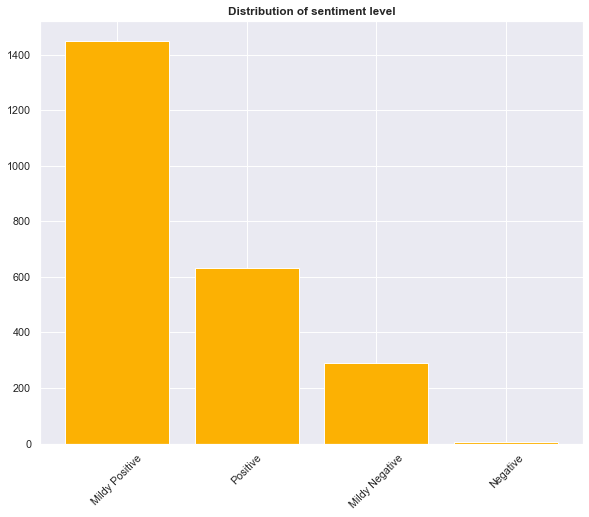

In [31]:
#graph:
fig, ax = plt.subplots(figsize = (10,8), dpi=70)
plt.xticks(rotation = 45)

ax.bar(df_sen_sort_keep['sentiment_level'],df_sen_sort_keep['rating'], color = '#fcb103');
ax.set_title("Distribution of sentiment level", fontweight = 'bold');

In [14]:
#train test split
from sklearn.model_selection import train_test_split

X = df2.drop(['rating','asin'], axis='columns')
y = df2.rating

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
len(X_train)

1900

In [17]:
len(X_test)

475

In [18]:
#Create KNN (K Neighrest Neighbour Classifier)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:

knn.score(X_test, y_test)

0.6442105263157895

In [23]:

knn.predict([['B00005N7P0']])

/Users/vanshikatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/Users/vanshikatib/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: could not convert string to float: 'B00005N7P0'

In [24]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = df.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

SyntaxError: invalid syntax (1453472982.py, line 1)

### SURPRISE

In [37]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.2 MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl size=785675 sha256=d6013be8fa16299d28db1953a5ee48b4c20d212c6e128f3c92d4ef8ee9a933fd
  Stored in directory: /Users/vanshikatib/Library/Caches/pip/wheels/20/91/57/2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [1]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split


In [2]:
keep = ['reviewerID','asin', 'rating']
df3 = df[keep]

NameError: name 'df' is not defined

In [34]:
df3.head(10)

,reviewerID,asin,rating
0,A5QQOOZJOVPSF,B00005N7P0,4
1,A5RHZE7B8SV5Q,B00005N7PS,5
2,A1RPTVW5VEOSI,B00005N7PS,1
3,A1SFRBCMW8XVBW,B00005N7PS,1
4,A1IU9VPCBKZPE8,B00005N7P0,5
5,AG6TX1ZJHLMO7,B00005N7PS,4
6,A3OIE7IE9LTPJG,B00005N7P0,5
7,A3JPFWKS83R49V,B00005N7PS,3
8,A3JPFWKS83R49V,B00005N7P0,4
9,A5RHZE7B8SV5Q,B00005N7P0,1


In [35]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df3[['reviewerID','asin', 'rating']], reader)


NameError: name 'Reader' is not defined